# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Dataset Link

In [2]:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
df = pd.read_csv('spam.csv', header = 0, engine = 'python',  encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.size

11144

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.shape

(5572, 2)

In [11]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.columns = ["ham_spam", "message"]

In [13]:
df.head()

,ham_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

ham_spam    0
message     0
dtype: int64

In [15]:
df.duplicated().values.any()

True

In [16]:
df.duplicated().sum()


403

In [17]:
duplicates = df[df.duplicated(subset=["ham_spam", "message"], keep=False)]

In [18]:
print("\nNumber of duplicated rows:", len(duplicates))


Number of duplicated rows: 684


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.describe()

,ham_spam,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [21]:
df.shape

(5169, 2)

In [22]:
df.head()

,ham_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

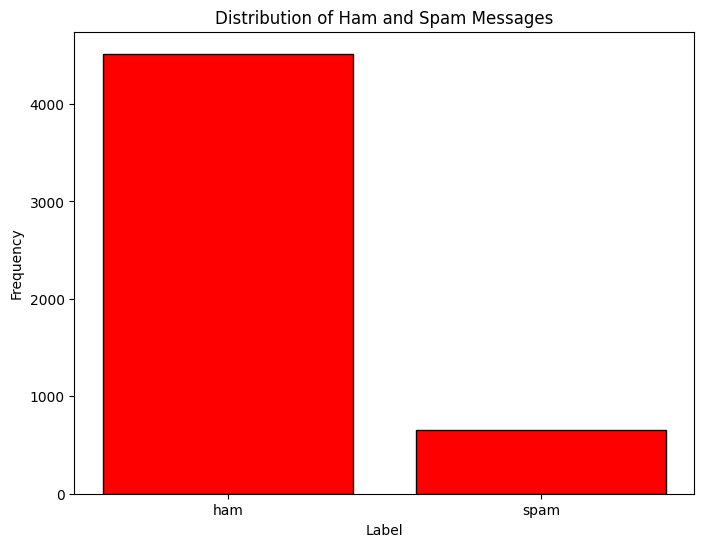

In [23]:
# Plot distribution of "ham_spam" column
plt.figure(figsize=(8, 6))
# Count the occurrences of each label
counts = df['ham_spam'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values, color='red', edgecolor='black')

# Adding a title and labels
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [24]:
try:
    # Encode the "label" column using factorize
    df["ham_spam"], _ = pd.factorize(df["ham_spam"])
except KeyError as e:
    print(f"Error: {e}. The 'ham_spam' column was not found in the DataFrame.")

In [25]:
df.head()

,ham_spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# TF-IDF Vectorization

In [26]:
vectorization = TfidfVectorizer()

In [27]:
X = vectorization.fit_transform(df["message"])
X_array = X.toarray()

In [28]:
print(X_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
X.shape

(5169, 8672)

In [30]:
y = df["ham_spam"]

In [31]:
y.shape

(5169,)

In [32]:
df.count()

ham_spam    5169
message     5169
dtype: int64

# Plotting the Pie-chart

In [33]:
p, k = len(df[df["ham_spam"] == 0]), len(df[df["ham_spam"] == 1])

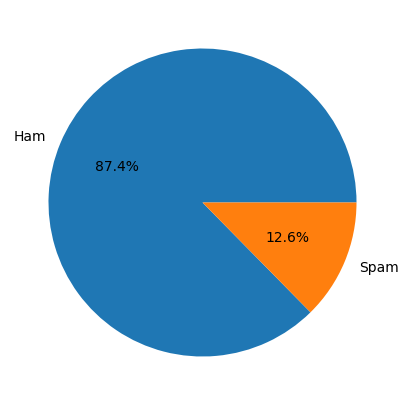

In [34]:
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()

# Data Preprocess

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# Navie Bayes Classifier

In [36]:
nb_model = MultinomialNB()

In [37]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [38]:
nb_prediction = nb_model.predict(X_test)

In [39]:
print("Naive Bayes Model:\n")
print(confusion_matrix(y_test, nb_prediction))
print(classification_report(y_test, nb_prediction))
print("Accuracy: ", accuracy_score(y_test, nb_prediction))
print("r2_Score: ", r2_score(y_test, nb_prediction))
print("Precision_score: ", precision_score(y_test, nb_prediction))
print("Recall_score: ", recall_score(y_test, nb_prediction))
print("f1_score: ", f1_score(y_test, nb_prediction))

Naive Bayes Model:

[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


# Logistic Regression Model

In [40]:
lr_model = LogisticRegression()

In [41]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
lr_prediction = lr_model.predict(X_test)

In [45]:
print("Logistic Regression Model:\n")
print(confusion_matrix(y_test, lr_prediction))
print(classification_report(y_test, lr_prediction))
print("Accuracy: ", accuracy_score(y_test, lr_prediction))
print("r2_Score: ", r2_score(y_test, lr_prediction))
print("Precision_score: ", precision_score(y_test, lr_prediction))
print("Recall_score: ", recall_score(y_test, lr_prediction))
print("f1_score: ", f1_score(y_test, lr_prediction))

Logistic Regression Model:

[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.816


# Support Vector Machine

In [46]:
svm_model = SVC(kernel = 'linear')

In [47]:
svm_model.fit(X_test, y_test)

SVC(kernel='linear')

In [48]:
svm_prediction = svm_model.predict(X_test)

In [49]:
print("Support Vector Machine (SVM) Model:\n")
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))
print("\nAccuracy: ", accuracy_score(y_test, svm_prediction))
print("\nr2_Score: ", r2_score(y_test, svm_prediction))
print("\nPrecision_score: ", precision_score(y_test, svm_prediction))
print("\nRecall_score:", recall_score(y_test, svm_prediction))


Support Vector Machine (SVM) Model:

[[889   0]
 [  1 144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      0.99      1.00       145

    accuracy                           1.00      1034
   macro avg       1.00      1.00      1.00      1034
weighted avg       1.00      1.00      1.00      1034


Accuracy:  0.9990328820116054

r2_Score:  0.9919785888832862

Precision_score:  1.0

Recall_score: 0.993103448275862
